In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from IPython.display import display, HTML

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
# reading the data
df = pd.read_csv('C:/Users/nayak/Downloads/malware_multiclass.csv')
print(df.shape)
df=df.rename(columns=lambda x: x.strip())
cols=df.columns
display(HTML(df.head(10).to_html()))

(100000, 36)


,hash,millisecond,classification,os,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,cached_hole_size,free_area_cache,mm_users,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,end_data,last_interval,nvcsw,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,0,malware,CentOS,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,1,malware,Windows,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,2,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,3,malware,Ubuntu,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,4,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
5,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,5,malware,Windows,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
6,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,6,malware,Ubuntu,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
7,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,7,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
8,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,8,malware,CentOS,0,0,3069378560,14274,0,0,0,13173,0,0,24,724,6850,0,150,120,124,210,0,120,3473,341974,0,0,120,0,3204448256,380690,4,0,0,0
9,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914e223349672eca79ad0,9,malware,Mac,0,0,3069378560,14274,0,0,0,13173,0,0,25,724,6852,0,150,120,124,211,0,120,3473,341974,0,130,120,0,3204448256,380690,4,0,0,0


In [15]:
# selecting columns specified in readme file
df = df.loc[:, ['classification', 'os', 'usage_counter', 'prio', 'static_prio', 'normal_prio', 'vm_pgoff', 'vm_truncate_count', 'task_size', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm', 'reserved_vm', 'nr_ptes', 'nvcsw', 'nivcsw', 'signal_nvcsw']]
display(HTML(df.head(10).to_html()))

,classification,os,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,shared_vm,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw
0,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
1,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
2,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
3,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
4,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
5,malware,Windows,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
6,malware,Ubuntu,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
7,malware,Mac,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
8,malware,CentOS,0,3069378560,14274,0,0,13173,0,6850,0,150,120,124,210,0,341974,0,0
9,malware,Mac,0,3069378560,14274,0,0,13173,0,6852,0,150,120,124,211,0,341974,0,0


In [16]:
# checking if the data has null values
df.isna().sum()

classification       0
os                   0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
vm_pgoff             0
vm_truncate_count    0
task_size            0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
nvcsw                0
nivcsw               0
signal_nvcsw         0
dtype: int64

In [17]:
# convert all nominal variables to binary variables
df_num=df.copy(deep=True) 
df_dummies=pd.get_dummies(df_num['os'],dtype=float)
df_num=df_num.join(df_dummies)
# drop original columns
df_num=df_num.drop('os',axis=1)
df_num.head()

,classification,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,...,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,CentOS,Debian,Mac,Ubuntu,Windows
0,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,1.0,0.0,0.0,0.0,0.0
1,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,0.0,0.0,0.0,0.0,1.0
2,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,0.0,0.0,1.0,0.0,0.0
3,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,0.0,0.0,0.0,1.0,0.0
4,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,210,0,341974,0,0,0.0,0.0,1.0,0.0,0.0


In [18]:
# dropping the extra column
df_num.drop('CentOS', axis=1, inplace=True)
df_num.head()

,classification,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,...,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,Debian,Mac,Ubuntu,Windows
0,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0.0,0.0,0.0,0.0
1,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0.0,0.0,0.0,1.0
2,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0.0,1.0,0.0,0.0
3,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0.0,0.0,1.0,0.0
4,malware,0,3069378560,14274,0,0,13173,0,6850,0,...,124,210,0,341974,0,0,0.0,1.0,0.0,0.0


In [21]:
df_num.drop('classification', axis=1, inplace=True)
cols_to_norm = df_num.columns.to_list()
df_num[cols_to_norm] = df_num[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [22]:
df_num.head()

,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,...,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,Debian,Mac,Ubuntu,Windows
0,NaN,0.18254,0.016007,NaN,NaN,0.199175,NaN,0.16651,NaN,0.052031,...,0.307692,0.249311,NaN,0.091519,0.0,NaN,0.0,0.0,0.0,0.0
1,NaN,0.18254,0.016007,NaN,NaN,0.199175,NaN,0.16651,NaN,0.052031,...,0.307692,0.249311,NaN,0.091519,0.0,NaN,0.0,0.0,0.0,1.0
2,NaN,0.18254,0.016007,NaN,NaN,0.199175,NaN,0.16651,NaN,0.052031,...,0.307692,0.249311,NaN,0.091519,0.0,NaN,0.0,1.0,0.0,0.0
3,NaN,0.18254,0.016007,NaN,NaN,0.199175,NaN,0.16651,NaN,0.052031,...,0.307692,0.249311,NaN,0.091519,0.0,NaN,0.0,0.0,1.0,0.0
4,NaN,0.18254,0.016007,NaN,NaN,0.199175,NaN,0.16651,NaN,0.052031,...,0.307692,0.249311,NaN,0.091519,0.0,NaN,0.0,1.0,0.0,0.0


In [23]:
df_num.describe()

,usage_counter,prio,static_prio,normal_prio,vm_pgoff,vm_truncate_count,task_size,map_count,hiwater_rss,total_vm,...,exec_vm,reserved_vm,nr_ptes,nvcsw,nivcsw,signal_nvcsw,Debian,Mac,Ubuntu,Windows
count,0.0,100000.000000,100000.000000,0.0,0.0,100000.000000,0.0,100000.000000,0.0,100000.000000,...,100000.000000,100000.000000,0.0,100000.000000,100000.000000,0.0,100000.000000,100000.000000,100000.000000,100000.000000
mean,NaN,0.499762,0.234841,NaN,NaN,0.321712,NaN,0.241567,NaN,0.093546,...,0.343059,0.242872,NaN,0.226876,0.090387,NaN,0.199140,0.199460,0.200680,0.201100
std,NaN,0.287065,0.258006,NaN,NaN,0.186489,NaN,0.147887,NaN,0.111189,...,0.214211,0.155259,NaN,0.194690,0.144466,NaN,0.399356,0.399596,0.400511,0.400825
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.248016,0.020373,NaN,NaN,0.169110,NaN,0.150023,NaN,0.033856,...,0.192308,0.114325,NaN,0.091519,0.002740,NaN,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.492063,0.121509,NaN,NaN,0.317833,NaN,0.206165,NaN,0.061654,...,0.336538,0.225895,NaN,0.204049,0.024658,NaN,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.743056,0.458611,NaN,NaN,0.456305,NaN,0.316299,NaN,0.115110,...,0.442308,0.336088,NaN,0.298492,0.126027,NaN,0.000000,0.000000,0.000000,0.000000
max,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,1.000000,...,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000


In [25]:
# dropping the Nan as all values of it are zeroes
df_num.drop(['usage_counter', 'normal_prio', 'vm_pgoff', 'task_size', 'hiwater_rss', 'nr_ptes', 'signal_nvcsw'], axis=1, inplace=True)
df_num.head()

,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw,Debian,Mac,Ubuntu,Windows
0,0.18254,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,0.0
1,0.18254,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,1.0
2,0.18254,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,1.0,0.0,0.0
3,0.18254,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0
4,0.18254,0.016007,0.199175,0.16651,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,1.0,0.0,0.0


In [27]:
df_kmeans = df_num.copy(deep=True)
df_knn = df_num.copy(deep=True)

'Data:'

,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw,Debian,Mac,Ubuntu,Windows,Cluster
0,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,0.0,1
1,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,1.0,1
2,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,1.0,0.0,0.0,3
3,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0,4
4,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,1.0,0.0,0.0,3
5,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,1.0,1
6,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,1.0,0.0,4
7,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,1.0,0.0,0.0,3
8,0.18254,0.016007,0.199175,0.166510,0.052031,1.0,0.307692,0.249311,0.091519,0.0,0.0,0.0,0.0,0.0,1
9,0.18254,0.016007,0.199175,0.166589,0.052031,1.0,0.307692,0.250689,0.091519,0.0,0.0,1.0,0.0,0.0,3


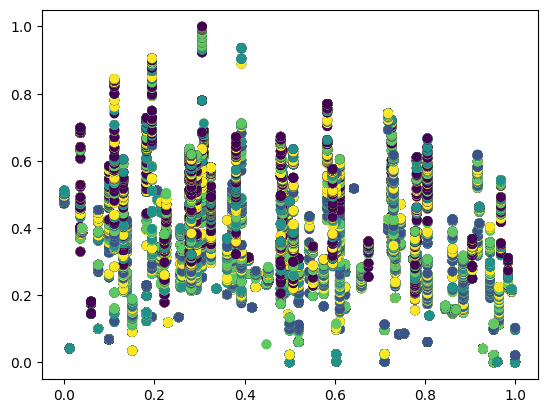

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=5, random_state=1,max_iter=500)
kmeans.fit(df_kmeans)
y_pred=kmeans.predict(df_kmeans)

plt.scatter(df_kmeans['prio'],df_kmeans['vm_truncate_count'],c=y_pred,cmap='viridis')

# get the cluster labels and add it back to the original data
opt=kmeans.labels_
df_knn['Cluster']=opt
display('Data:',HTML(df_knn.head(10).to_html()))

1.5


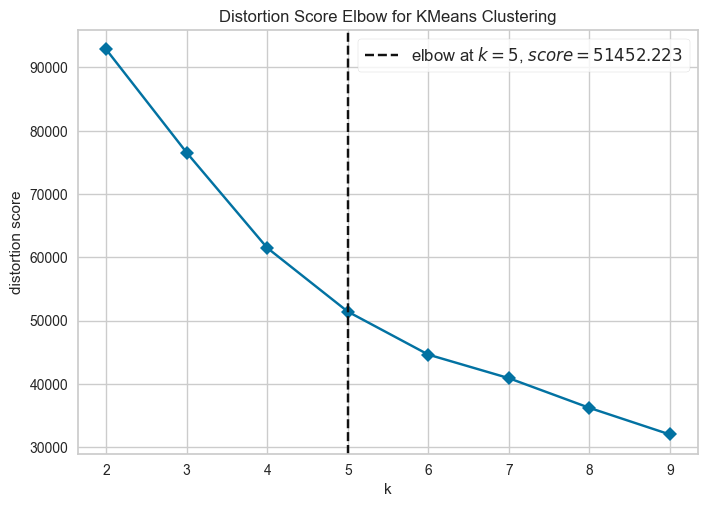

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
print(yellowbrick.__version__)

km = KMeans(random_state=42,max_iter=500, algorithm='elkan')
visualizer = KElbowVisualizer(km, k=(2,10), timings=False, distance_metric='euclidean', metric='distortion')
visualizer.fit(df_kmeans)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [35]:
# dividing into clustering
km = KMeans(n_clusters=5)
km = km.fit(df_kmeans)

opt=km.labels_
df_knn['Cluster']=opt
display('Data:',HTML(df_knn.tail(10).to_html()))

'Data:'

,prio,static_prio,vm_truncate_count,map_count,total_vm,shared_vm,exec_vm,reserved_vm,nvcsw,nivcsw,Debian,Mac,Ubuntu,Windows,Cluster
99990,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,1.0,0.0,0.0,0.0,3
99991,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,1.0,0.0,0
99992,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,0.0,0.0,3
99993,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,1.0,0.0,0.0,0.0,3
99994,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,1.0,0.0,0.0,0.0,3
99995,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,0.0,0.0,3
99996,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,0.0,1.0,2
99997,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,0.0,0.0,3
99998,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,0.0,1.0,0.0,0
99999,0.928571,0.0,0.040717,0.04153,0.01283,1.0,0.048077,0.084022,0.0,0.005479,0.0,1.0,0.0,0.0,1


In [45]:
# Evaluating the clustering
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(df_num, opt)

print("Silhouette Score:", silhouette)

Silhouette Score: 0.33248212708731995


In [46]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(df_num, opt)

print("Davies Bouldin Score:", db_index)

Davies Bouldin Score: 1.3053753158670591
